In [1]:
import numpy as np
import hammer
import matplotlib.pyplot as plt
import abc
from dataclasses import dataclass


In [2]:
class GaussHammer(hammer.Hammer):
    def log_prob(self, x, mu, sig):
        return -0.5 * np.sum(((x - mu) / sig)**2, axis=-1)


In [9]:
log_prob_args = dict(mu=0, sig=1)
std_prob = 1.65
num_step = 2**12
num_walk = 32
num_dim = 3

state_init = np.zeros((num_walk, num_dim))
state_init[:] = np.linspace(-1, 1, num_walk)[:, None]

gh = GaussHammer(state_init, std_prob, num_step, num_walk, num_dim, mu=0, sig=1)
gh.run()
std = np.std(gh.samples, axis=(0, 1))
np.all(std) < 1.2


True

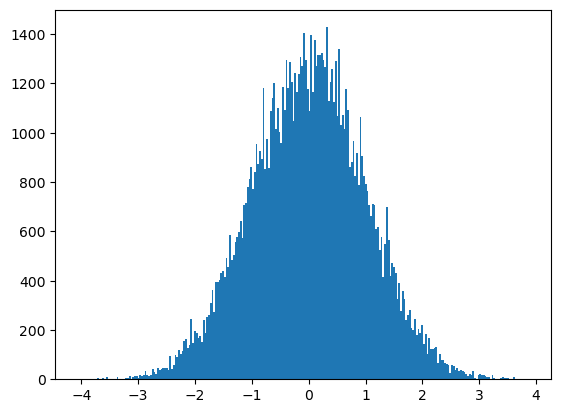

In [10]:
plt.hist(gh.samples[:, :, 0].flatten(), bins=256);

